In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

horse


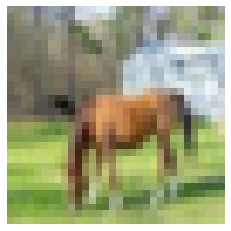

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,50000-1)
plt.axis("off")
#trans[0] → "airplane"
catergory = y_train[c][0]
print(trans[catergory])
plt.imshow(x_train[c])

In [5]:
#資料預處理
# 1.題目預處理(Normalize常態化)
#Keras在準備隨機那組weights,跟Normalize的圖片比較搭
#第一種方式:0~1 第二種方式-1~1
#卷積不需要攤開，直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
#Demo
x_train_shape[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
#2.答案預處理(One-Hot-Encoding)
#跟上次一模一樣
#希望的樣子:[P0,P1,....,P9]
#5:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print("原來:",y_train[1])
print("後來:",y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from tensorflow.keras.models import Sequential
#MLP
from tensorflow.keras.layers import Dense,Flatten
#Convolution 卷積
from tensorflow.keras.layers import Conv2D,MaxPooling2D
cnn = Sequential()
#(一個過濾器)3*3*3*(filter數目)32+(bias)32=896
cnn.add(Conv2D(32,(3,3),
               input_shape=(32,32,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
#(一個過濾器)3*3*32*(filter數目)64+(bias)64=18496
cnn.add(Conv2D(64,(3,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(128,(3,3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(256,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [8]:
#compile:確定模型訓練方式....等
#隨機(隨便選一組weights)梯度(正確方向)下降

#loss:最後輸出一個 → binary_crossentropy
#loss:最後輸出多個 → categorical_crossentropy

# optimizer:下降的時候優化 → 基於動量(我在走的時候不是等速度，而有速度的累積)
cnn.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
           optimizer="adam")

In [9]:
#batch:看幾筆(200)做一次梯度下降(修正)
#epochs:整份考古題看幾次(10)
#10個epochs、200batch:60000*10/200=3000(次)梯度下降(修正)
cnn.fit(x_train_shape,y_train_cat,batch_size=200,epochs=15,validation_split=0.1,verbose=1)

Epoch 1/15
225/225 [==============================] - 4s 19ms/step - loss: 1.6179 - accuracy: 0.4126 - val_loss: 1.2985 - val_accuracy: 0.5374
Epoch 2/15
225/225 [==============================] - 4s 17ms/step - loss: 1.2117 - accuracy: 0.5687 - val_loss: 1.1380 - val_accuracy: 0.5950
Epoch 3/15
225/225 [==============================] - 4s 17ms/step - loss: 1.0281 - accuracy: 0.6358 - val_loss: 0.9971 - val_accuracy: 0.6530
Epoch 4/15
225/225 [==============================] - 4s 17ms/step - loss: 0.9007 - accuracy: 0.6863 - val_loss: 0.9058 - val_accuracy: 0.6938
Epoch 5/15
225/225 [==============================] - 4s 17ms/step - loss: 0.8129 - accuracy: 0.7171 - val_loss: 0.8404 - val_accuracy: 0.7126
Epoch 6/15
225/225 [==============================] - 4s 17ms/step - loss: 0.7383 - accuracy: 0.7450 - val_loss: 0.8363 - val_accuracy: 0.7186
Epoch 7/15
225/225 [==============================] - 4s 18ms/step - loss: 0.6738 - accuracy: 0.7657 - val_loss: 0.7755 - val_accuracy: 0.7406

In [10]:
#預測
cnn.evaluate(x_test_shape,y_test_cat)

313/313 [==============================] - 1s 5ms/step - loss: 0.9193 - accuracy: 0.7353


[0.9192898273468018, 0.7353000044822693]

In [11]:
# trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
import pandas as pd
# predict → 機率
# predict_classes → 分類
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0,1,2,3,4,5,6,7,8,9
0,781,18,42,20,21,9,4,8,60,37
1,12,835,3,7,2,5,3,3,39,91
2,65,5,703,45,70,49,22,22,8,11
3,23,10,116,523,62,146,29,37,30,24
4,19,3,105,51,698,24,15,70,10,5
5,20,5,84,148,41,626,8,49,13,6
6,6,9,104,78,51,33,692,5,13,9
7,16,2,45,35,43,46,2,792,6,13
8,49,27,15,8,11,4,0,1,865,20
9,31,68,11,5,3,7,1,13,23,838


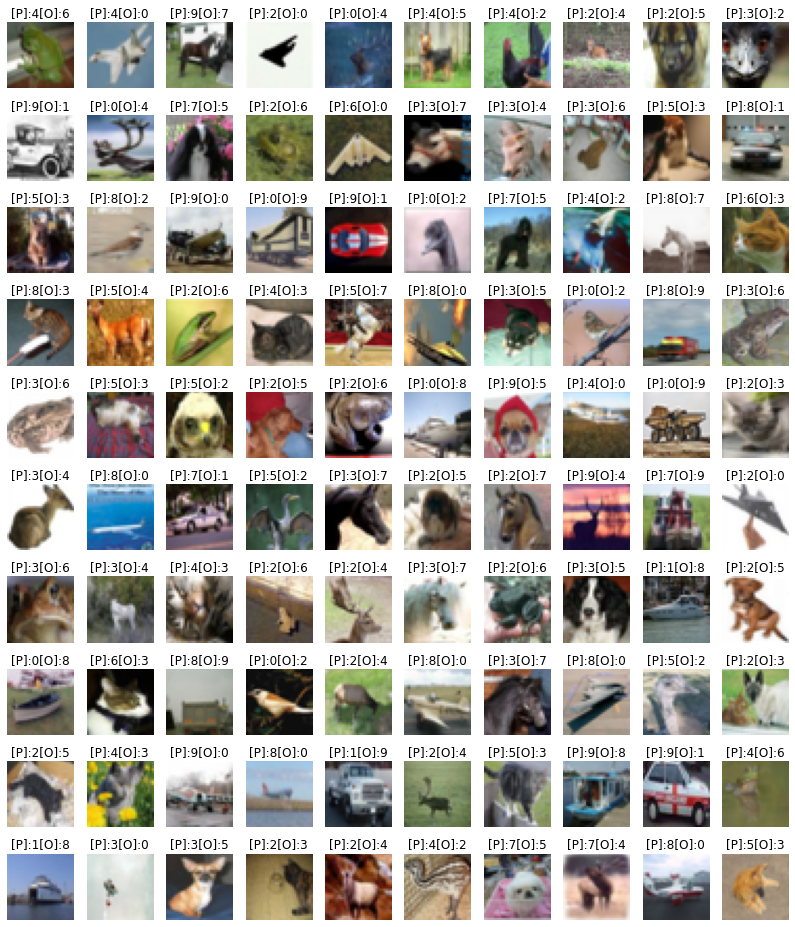

In [17]:
# numpy才能這樣直接每個數字比較
import numpy as np
#list:list(一個數字)
#numpy array:nparray[[多個數字]]
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
#預測錯誤的圖的原本標籤
ori_false = y_dim[diff]
#預測錯誤的圖的預測標籤
pre_false = pre[diff]
#把圖拿出來
img_false = x_test[diff]
#整張圖的寬高
plt.figure(figsize=(14,450))
#我們每一個列就是10個
width = 10
height = int(len(img_false)/10)+1
for (i,img) in enumerate(img_false[0:100]):
    #(列數,行數,第幾張圖(i開始))
    plt.subplot(height,width,i+1)
    plt.axis("off")
    t="[P]:"+ str(pre_false[i]) + "[O]:"+str(ori_false[i])
    plt.title(t)
    plt.imshow(img)
# trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]